# Template Notebook

## Setup

### Standard library imports

In [1]:
%load_ext autoreload

In [2]:
import sys
import warnings
import logging

sys.path.append('../..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

### Imports

In [156]:
%autoreload 2

from typing import Callable, Iterable, Union

import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from sklearn import metrics
from scipy import special, stats
from tqdm import tqdm

from source.estimators.orthogonal import OrthogonalEstimator
from source.basis.orthogonal import OrthogonalBasis
from source.basis import generators

### Paths

In [5]:
def real_m(x, alpha=1):
    return (np.abs(x) < 1) * (alpha * np.power(x, 2)) + 1 * (np.abs(x) < 2) * (np.abs(x) >= 1)

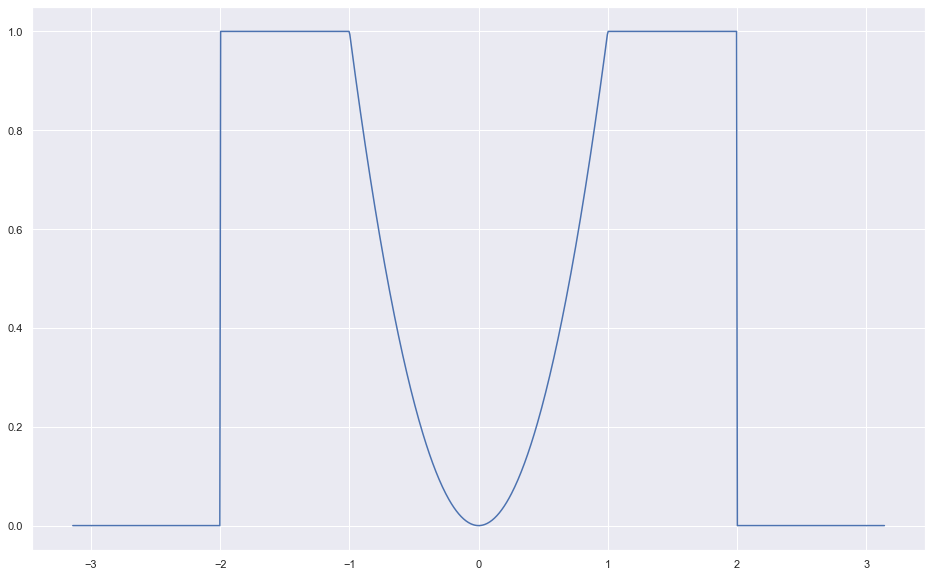

In [6]:
figure = plt.figure(figsize=[16, 10])
x = np.linspace(-np.pi, np.pi, 1000)
_ = plt.plot(x, real_m(x))

In [152]:
estimator = OrthogonalEstimator(basis="hermite", n_functions=50)

In [157]:
x = stats.uniform.rvs(size=1000, scale=2*np.pi) - np.pi
y = real_m(x) + stats.norm.rvs(size=1000, scale=0.05)

In [158]:
estimator.fit(x, y)

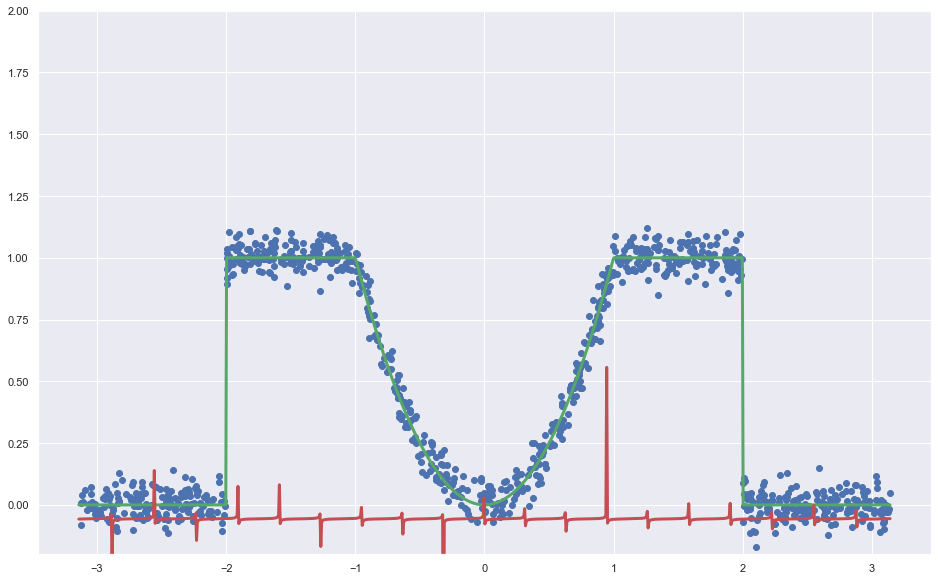

In [159]:
figure = plt.figure(figsize=[16, 10])
t = np.linspace(-np.pi, np.pi, 1000)
_ = plt.scatter(x, y)
_ = plt.plot(t, real_m(t), c="g", linewidth=3)
_ = plt.plot(t, estimator.predict(t), c="r", linewidth=3)
_ = plt.ylim([-0.2, 2.0])

### Basis

In [101]:
hermite = np.polynomial.hermite.Hermite.fit(x, y, deg=64)

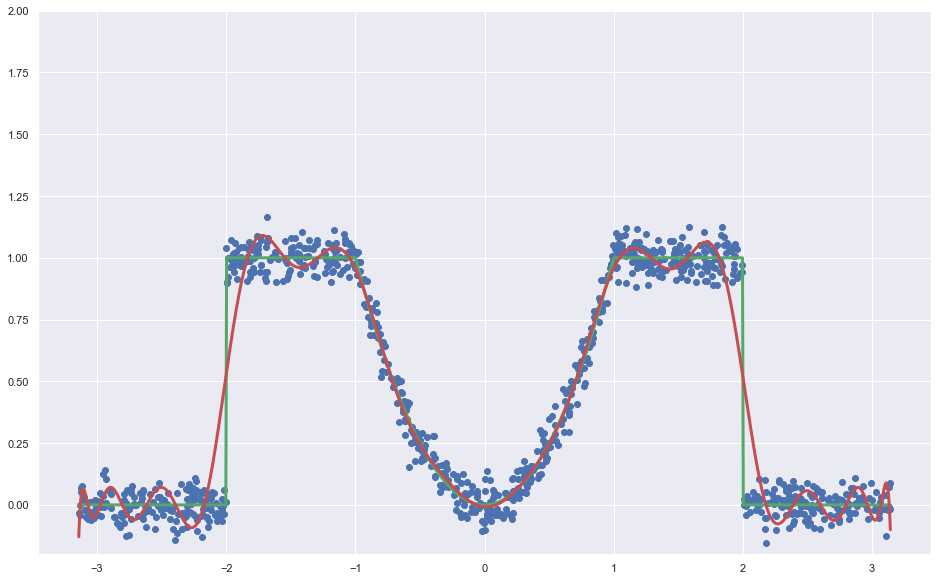

In [102]:
figure = plt.figure(figsize=[16, 10])
t = np.linspace(-np.pi, np.pi, 1000)
_ = plt.scatter(x, y)
_ = plt.plot(t, real_m(t), c="g", linewidth=3)
_ = plt.plot(t, hermite(t), c="r", linewidth=3)
_ = plt.ylim([-0.2, 2.0])

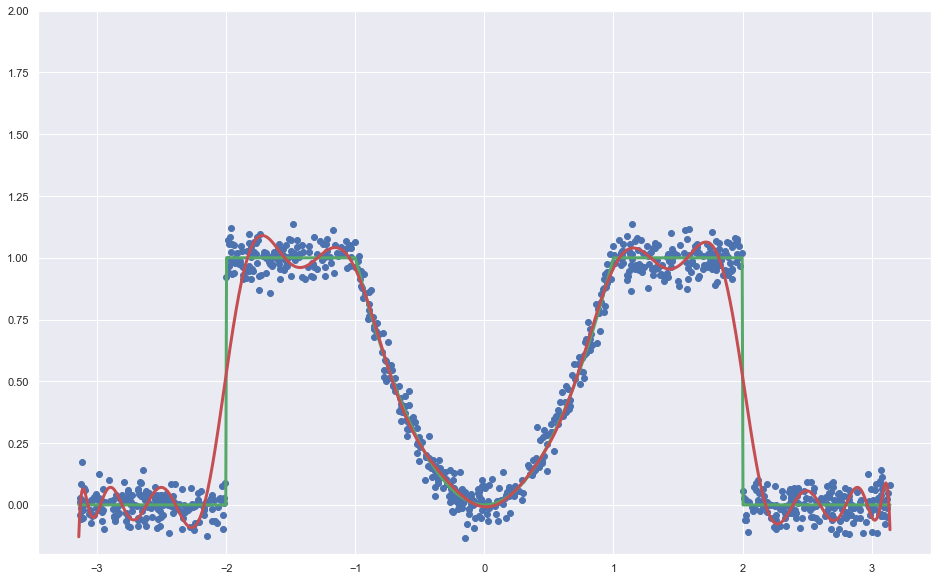

In [124]:
figure = plt.figure(figsize=[16, 10])
t = np.linspace(-np.pi, np.pi, 1000)
_ = plt.scatter(x, y)
_ = plt.plot(t, real_m(t), c="g", linewidth=3)
_ = plt.plot(t, hermite(t), c="r", linewidth=3)
_ = plt.ylim([-0.2, 2.0])

In [143]:
basis_generators = {
    "hermite": np.polynomial.hermite.Hermite.fit,
    "cheby": np.polynomial.chebyshev.Chebyshev.fit,
    "legendre": np.polynomial.legendre.Legendre.fit,
    "laguerre": np.polynomial.laguerre.Laguerre.fit,
}

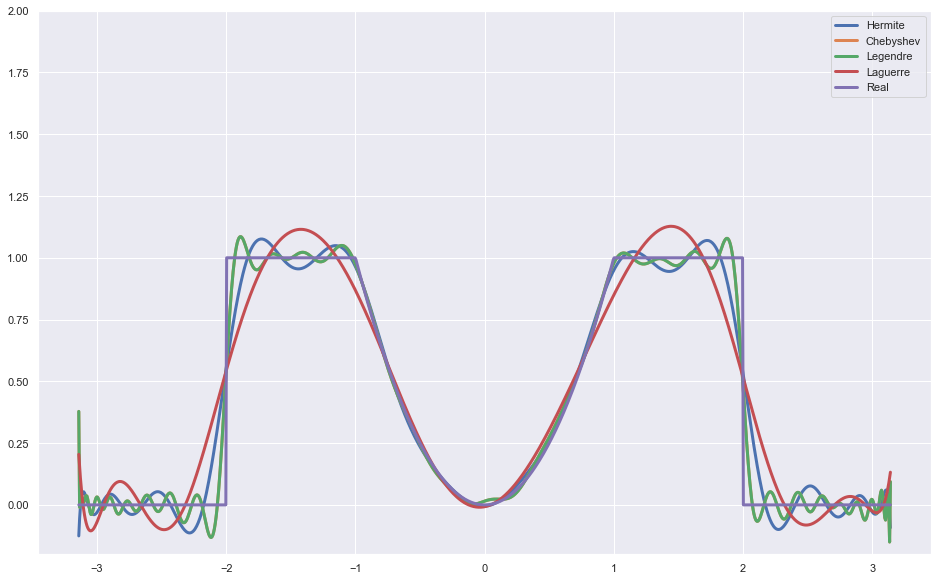

In [150]:
figure = plt.figure(figsize=[16, 10])
t = np.linspace(-np.pi, np.pi, 1000)
# _ = plt.scatter(x, y)

for generator in basis_generators.keys():
    estimator = basis_generators[generator](x, y, deg=64)
    _ = plt.plot(t, estimator(t), linewidth=3)

_ = plt.plot(t, real_m(t), linewidth=3)
_ = plt.ylim([-0.2, 2.0])
_ = plt.legend(["Hermite", "Chebyshev", "Legendre", "Laguerre", "Real"])

In [177]:
np.polynomial.laguerre.Laguerre.basis(deg=5)

Laguerre([0., 0., 0., 0., 0., 1.], domain=[0., 1.], window=[0., 1.])